In [191]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import concat
import pandas_datareader as data
from pandas_datareader import data as pdr
import seaborn as sns
import matplotlib.dates as mdates

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import tensorflow

In [192]:
#creating a start date and end date
start = '2010-01-01'
end =  datetime.today().strftime("%Y-%m-%d")
#end = '2019-12-31'
yf.pdr_override()
company = 'TSLA'
#creating the dataframe
df= pdr.get_data_yahoo(company, start, end)

#getting the first 5 rows and the last 5 rows
print(df.head(5))
print(df.tail(5))

df.shape

[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-11  122.089996  125.949997  120.510002  123.220001  123.220001   
2023-01-12  122.559998  124.129997  117.000000  123.559998  123.559998   
2023-01-13  116.550003  122.629997  115.599998  122.400002  122.400002   
2023-01-17  125.699997  131.699997  125.019997  13

(3161, 6)

In [193]:
#dropping the adj close column as it is not needed since it similar to the close column and also the date column
#df = df.reset_index()
df.head()
#df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [194]:
#checking if there are any missing datas
missing_data = df[df.isna().any(axis=1)]
print(missing_data)
df.info()
print(df.shape)

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3161 entries, 2010-06-29 to 2023-01-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3161 non-null   float64
 1   High       3161 non-null   float64
 2   Low        3161 non-null   float64
 3   Close      3161 non-null   float64
 4   Adj Close  3161 non-null   float64
 5   Volume     3161 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 172.9 KB
(3161, 6)


Exploring the stock datasets

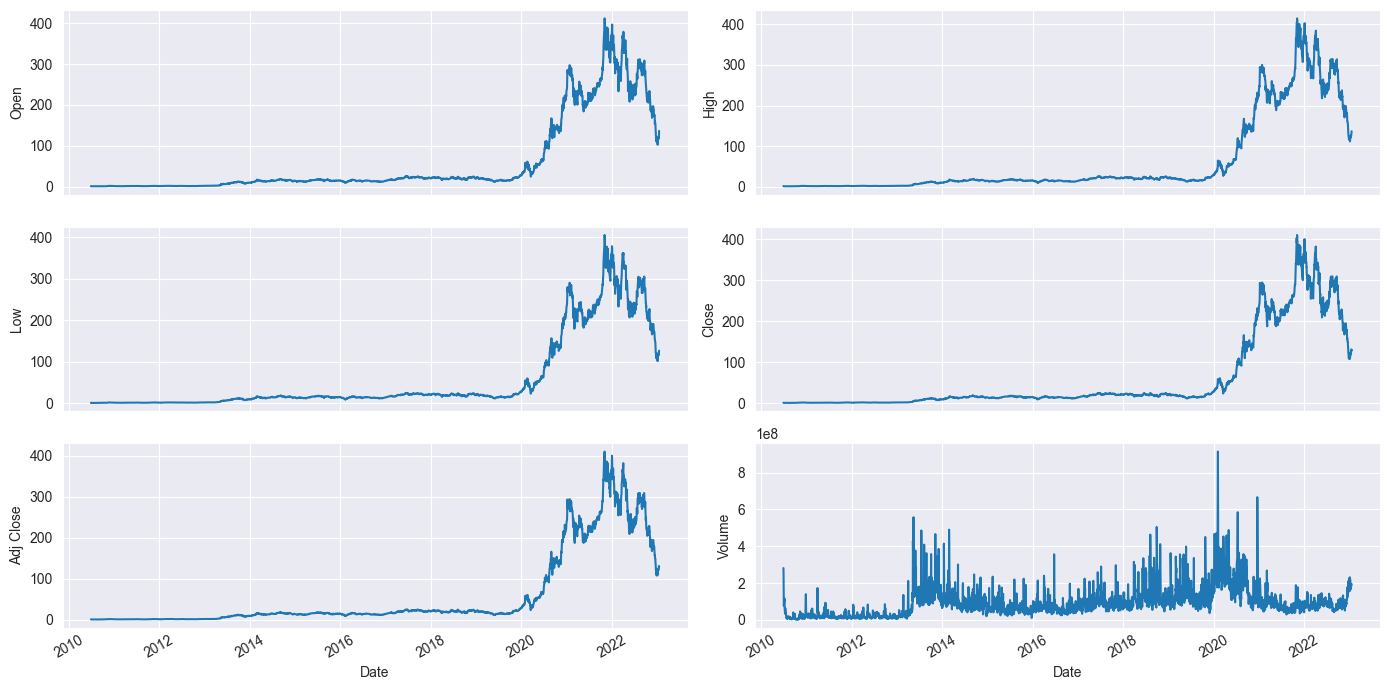

In [195]:
#Plot line charts
df_plot = df.copy()

ncols = 2
nrows = int(round(df_plot.shape[1] / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
for i, ax in enumerate(fig.axes):
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        #ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

Open         1.831894
High         1.831257
Low          1.831152
Close        1.830555
Adj Close    1.830555
Volume       2.361732
dtype: float64
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999729  0.999597  0.999198   0.999198  0.060996
High       0.999729  1.000000  0.999610  0.999636   0.999636  0.064510
Low        0.999597  0.999610  1.000000  0.999679   0.999679  0.057313
Close      0.999198  0.999636  0.999679  1.000000   1.000000  0.061648
Adj Close  0.999198  0.999636  0.999679  1.000000   1.000000  0.061648
Volume     0.060996  0.064510  0.057313  0.061648   0.061648  1.000000


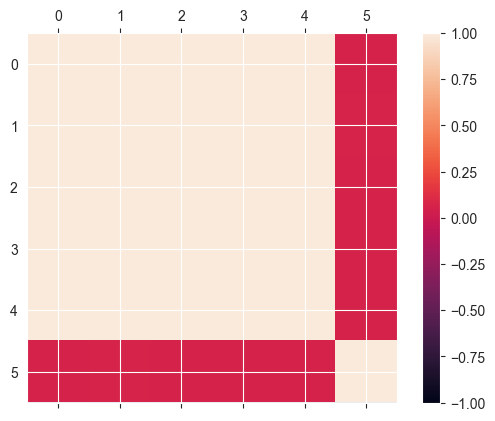

In [196]:
#checking how much skewness
print(df.skew())

#checking the correlations between the data
df_corr = df.corr(method='pearson')
print(df_corr)

#using correlation matrix plot
corr_fig = plt.figure()
axises = corr_fig.add_subplot(111)
axcorr = axises.matshow(df_corr, vmin=-1, vmax=1)

corr_fig.colorbar(axcorr)
ticks = np.arange(0,6,1)

#setting ticks for each axis
axises.set_xticks(ticks)
axises.set_yticks(ticks)

plt.show()

checking for outliers

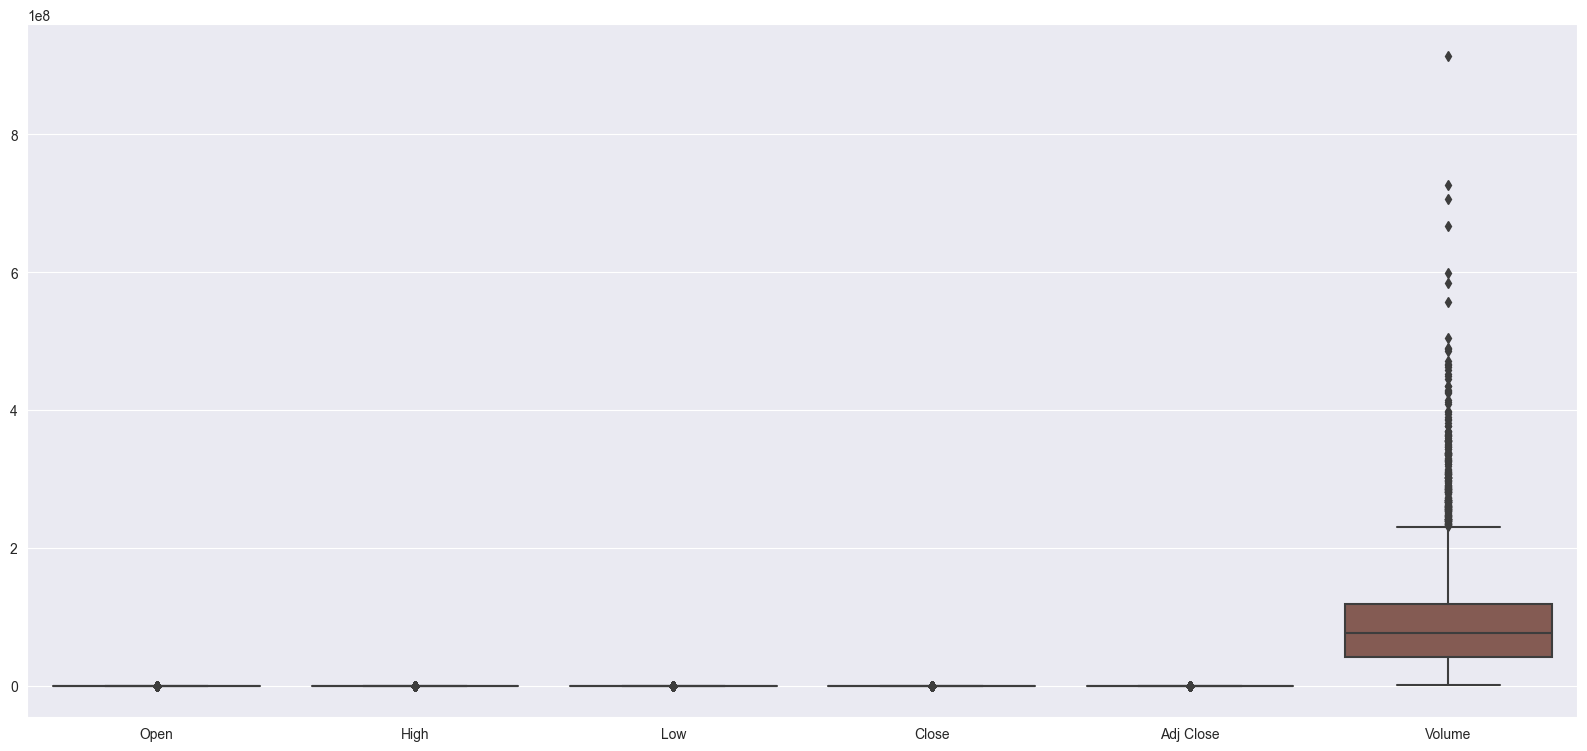

In [197]:
#checking if there is any outliers in the dataset
#use the simple imputer function to replace the empty values in the dataframe



import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,9))

# Create a boxplot of the data
sns.boxplot(data=df)
# Show the plot
plt.show()

In [198]:
from sklearn.impute import SimpleImputer
# Find the rows containing null values
outliers = df[df.isnull().any(axis=1)]

# Drop the rows containing null values
df = df.drop(outliers.index)

#use the simple imputer function to replace the empty values in the dataframe

#creating a header for the names
header_names = ['High','Low','Open','Close','Volume','Adj Close']

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df)
new_dataa = imputer.transform(df)

#convert the data back to a dataframe and bind the headers
df = pd.DataFrame(new_dataa, columns=header_names)

# Preview d data after removing the rows containing null values
df.head()

,High,Low,Open,Close,Volume,Adj Close
0,1.266667,1.666667,1.169333,1.592667,1.592667,281494500.0
1,1.719333,2.028000,1.553333,1.588667,1.588667,257806500.0
2,1.666667,1.728000,1.351333,1.464000,1.464000,123282000.0
3,1.533333,1.540000,1.247333,1.280000,1.280000,77097000.0
4,1.333333,1.333333,1.055333,1.074000,1.074000,103003500.0


In [199]:
#splitting the data into training and testing
train_header = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
target_header = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(df.shape)
print(train_header.shape)
print(target_header.shape)

(3161, 6)
(2212, 1)
(949, 1)


In [200]:
#Scaling the stock data so that they fit inbetween 0 and 1
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
scaler = MinMaxScaler(feature_range=(0,1))
train_header_array = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

train_header_array


array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.29675158],
       [0.31898106],
       [0.31235378]])

In [201]:
#define how many days in the past we will look into
#the closing price of the particular day would depend on the previous days
historical_data = 50

#########################
# PREPARING TRAINING DATA
#########################
x_train = []
y_train = []

for x in range(historical_data, train_header_array.shape[0]):
    x_train.append(train_header_array[x - historical_data:x, 0])
    y_train.append((train_header_array[x, 0])) #because we are considering only one column

# turning x and y train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [202]:
# now going to reshape the x_train so that it works with the neural network
# the 1 indicates one additional dimension
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [203]:
##################
# INSTANTIATE THE MODEL
##################
model = Sequential()

# now i can specify the layers - always add 1 LSTM layer and then a Dropout layer rinse/repeat the final layer is
# the Dense layer that is going to be just one unit, and it's going to the stock price prediction

model.add(LSTM(units=50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units =60, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.3))
model.add(LSTM(units =80, activation = 'relu', return_sequences = True, ))
model.add(Dropout(0.4))
model.add(LSTM(units =120, activation = 'relu'))
model.add(Dropout(0.5))
# prediction of the next closing price
model.add(Dense(units = 1))
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 50, 50)            10400     
                                                                 
 dropout_28 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_29 (LSTM)              (None, 50, 60)            26640     
                                                                 
 dropout_29 (Dropout)        (None, 50, 60)            0         
                                                                 
 lstm_30 (LSTM)              (None, 50, 80)            45120     
                                                                 
 dropout_30 (Dropout)        (None, 50, 80)            0         
                                                                 
 lstm_31 (LSTM)              (None, 120)             

Epoch 1/15
98/98 [==============================] - 16s 98ms/step - loss: 0.0122 - mae: 0.0564
Epoch 2/15
98/98 [==============================] - 9s 95ms/step - loss: 0.0040 - mae: 0.0324
Epoch 3/15
98/98 [==============================] - 9s 96ms/step - loss: 0.0041 - mae: 0.0348
Epoch 4/15
98/98 [==============================] - 14s 146ms/step - loss: 0.0040 - mae: 0.0338
Epoch 5/15
98/98 [==============================] - 10s 106ms/step - loss: 0.0033 - mae: 0.0291
Epoch 6/15
98/98 [==============================] - 10s 106ms/step - loss: 0.0028 - mae: 0.0255
Epoch 7/15
98/98 [==============================] - 9s 93ms/step - loss: 0.0026 - mae: 0.0240
Epoch 8/15
98/98 [==============================] - 9s 90ms/step - loss: 0.0023 - mae: 0.0236
Epoch 9/15
98/98 [==============================] - 9s 94ms/step - loss: 0.0028 - mae: 0.0258
Epoch 10/15
98/98 [==============================] - 9s 97ms/step - loss: 0.0025 - mae: 0.0249
Epoch 11/15
98/98 [==============================] -

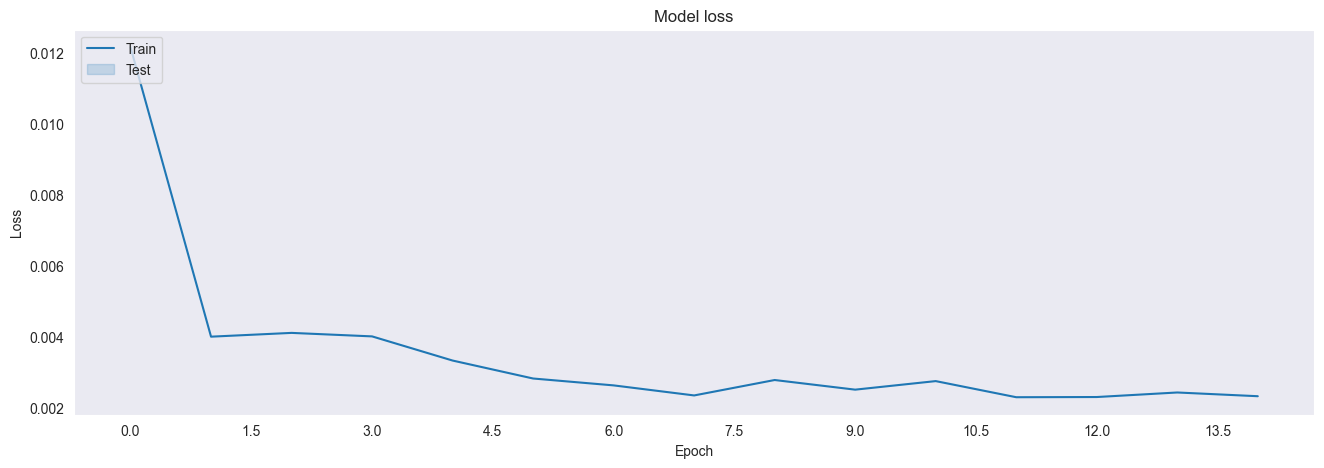

In [204]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics = ['mae'])
epochs = 15
history=model.fit(x_train, y_train, epochs=epochs)


# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
sns.lineplot(data=history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

SAVE THE MODEL SO IT WOULD BE USEFUL IN STREAMLIT

In [205]:

model.save('neww_lstm_model.h5')

In [206]:
# LOAD THE DATA - it has to be data the model has not seen before
# this is the time range of the data - we have the data but the model has never seen that data
# so this is a perfect way to see how well it performs
_start = '2010-01-01'
_end = datetime.today().strftime("%Y-%m-%d")
_data = pdr.get_data_yahoo(company, _start, _end)

[*********************100%***********************]  1 of 1 completed


In [207]:
#getting the actual prices
# we need to scale prices, we need to concatenate the full data set that we want to predict on
# this is NOT the predicted price, but the real price from the market
actual_prices = _data['Close'].values

In [208]:
# this will combine the training data and the test data
total_dataset = pd.concat((df['Close'], _data['Close']), axis=0)


In [209]:
# this is what our model is going to see as an input, so it can predict
model_inputs = total_dataset[len(total_dataset) - len(_data) - historical_data:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)


MAKE PREDICTIONS ON TEST DATA

In [210]:
###############################
# MAKE PREDICTIONS ON TEST DATA
###############################

# we don't use the y_test because we already have the stock prices
x_test = []
y_test = []
# if you remove the + 1 it will remove the newest data
for x in range(historical_data, len(model_inputs)):
    x_test.append(model_inputs[x - historical_data:x, 0])
    y_test.append(model_inputs[i, 0])

x_test,y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))



99/99 [==============================] - 3s 29ms/step


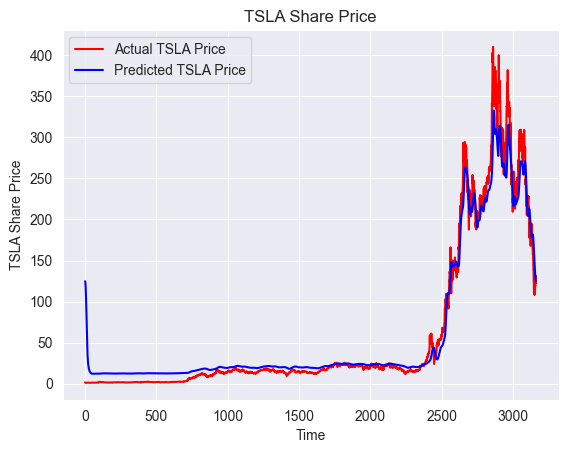

In [211]:
# now let's predict on the x_test data,the predicted prices are now going to be scaled, so we need to reverse scale them or rather inverse_transform them
y_pred = model.predict(x_test)
# now we are back to the actual predicted price, non-scaled
y_pred = scaler.inverse_transform(y_pred)

# now let plot the predictions instead of just numbers.
plt.plot(actual_prices, color="red", label=f"Actual {company} Price")
plt.plot(y_pred, color="blue", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
# you can also do .pdf for a vector like file (super zoomy)
plt.savefig('Prediction_test.svg')
# this acts as a 'end conn' situation
plt.show()

EVALUATING THE MODEL PERFORMANCES

In [212]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#evaluate the model
mae = mean_absolute_error(actual_prices, y_pred)
mse = mean_squared_error(actual_prices, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(actual_prices, y_pred)



#printing the model evaluation values
print('mae:  {:.2f}'.format(mae))
print('mse:  {:.2f}'.format(mse))
print('Root mean square error:  {:.2f}'.format(rmse))
print('R2 score: ', r2)




mae:  10.41
mse:  283.81
Root mean square error:  16.85
R2 score:  0.9688239287945523


Making Predictions for Next day

In [213]:
#########################
# PREDICTING OUR NEXT DAY
#########################

final_data = [model_inputs[len(model_inputs) + 1 - historical_data:len(model_inputs + 1), 0]]
final_data = np.array(final_data)
final_data = np.reshape(final_data, (final_data.shape[0], final_data.shape[1], 1))

print(scaler.inverse_transform(final_data[-1]))

Next_day = model.predict(final_data)
Next_day  = scaler.inverse_transform(Next_day)
print(f' Price Prediction for tomorrow would be: {Next_day}')

[[197.08000183]
 [191.30000305]
 [177.58999634]
 [190.72000122]
 [195.97000122]
 [190.94999695]
 [194.41999817]
 [186.91999817]
 [183.16999817]
 [180.19000244]
 [167.86999512]
 [169.91000366]
 [183.19999695]
 [182.86000061]
 [182.91999817]
 [180.83000183]
 [194.69999695]
 [194.69999695]
 [194.86000061]
 [182.44999695]
 [179.82000732]
 [174.03999329]
 [173.44000244]
 [179.05000305]
 [167.82000732]
 [160.94999695]
 [156.80000305]
 [157.66999817]
 [150.22999573]
 [149.86999512]
 [137.80000305]
 [137.57000732]
 [125.34999847]
 [123.15000153]
 [109.09999847]
 [112.70999908]
 [121.81999969]
 [123.18000031]
 [108.09999847]
 [113.63999939]
 [110.33999634]
 [113.05999756]
 [119.76999664]
 [118.84999847]
 [123.22000122]
 [123.55999756]
 [122.40000153]
 [131.49000549]
 [128.77999878]]
1/1 [==============================] - 1s 614ms/step
 Price Prediction for tomorrow would be: [[124.7545]]
